# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
#city = "Denver"

query_url= url + "appid=" + weather_api_key + "&q=" + city
print(query_url)


http://api.openweathermap.org/data/2.5/weather?appid=5ed795c09c212a19bdc0e2a9c1b8965d&q=kodiak


In [4]:
weather_response = requests.get(query_url)
weather_json = weather_response.json()

In [5]:
pprint(weather_json)

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 57.79, 'lon': -152.4072},
 'dt': 1611968948,
 'id': 5866583,
 'main': {'feels_like': 266.51,
          'humidity': 64,
          'pressure': 990,
          'temp': 275.15,
          'temp_max': 275.15,
          'temp_min': 275.15},
 'name': 'Saint Paul Harbor',
 'sys': {'country': 'US',
         'id': 7668,
         'sunrise': 1611944247,
         'sunset': 1611973684,
         'type': 1},
 'timezone': -32400,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 290, 'gust': 12.86, 'speed': 8.75}}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#lat = []
#long = []
#City	Lat	Lng	Max Temp	Humidity	Cloudiness	Wind Speed	Country	Date

city_data=[]
lat_data=[]
lng_data=[]
max_temp_data=[]
humidity_data=[]
cloudiness_data=[]
wind_speed_data=[]
country_data=[]
date_data=[]

counter = 0

#while len(city_data) <=15: 
for each_city in cities[:100]:
    query_url = f'{url}q={each_city}&appid={weather_api_key}'#rpl each_cities cities[counter]
    weather_response=requests.get(query_url)
    weather_data=weather_response.json()
    #pprint(weather_data)
    counter = counter + 1
 
    try:
        city_data.append(weather_data['name'])
        lat_data.append(weather_data['coord']['lat'])
        lng_data.append(weather_data['coord']['lon'])
        max_temp_data.append(weather_data['main']['temp_max'])
        humidity_data.append(weather_data['main']['humidity'])
        cloudiness_data.append(weather_data['clouds']['all'])
        wind_speed_data.append(weather_data['wind']['speed'])
        country_data.append(weather_data['sys']['country'])
        date_data.append(weather_data['dt'])
        print(f'Processing record number {len(city_data)} for the city of {each_city}')
        
        
    except:
        print('Skipping City')
        pass
    
    
    #print(lat_data)

Processing record number 1 for the city of bethel
Processing record number 2 for the city of geraldton
Processing record number 3 for the city of bredasdorp
Processing record number 4 for the city of lasa
Processing record number 5 for the city of darhan
Processing record number 6 for the city of kassala
Processing record number 7 for the city of port alfred
Processing record number 8 for the city of faanui
Processing record number 9 for the city of zhezkazgan
Processing record number 10 for the city of busselton
Processing record number 11 for the city of albany
Processing record number 12 for the city of constitucion
Processing record number 13 for the city of severo-kurilsk
Processing record number 14 for the city of puerto ayora
Processing record number 15 for the city of saint george
Processing record number 16 for the city of atuona
Processing record number 17 for the city of new norfolk
Processing record number 18 for the city of bulungu
Skipping City
Processing record number 19

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
data_df = pd.DataFrame({'City': city_data,
                        'Latitude': lat_data,
                        'Longitude': lng_data,
                        'Max Temp': max_temp_data,
                        'Humidity': humidity_data,
                        'Cloudiness': cloudiness_data,
                        'Wind Speed': wind_speed_data,
                        'Country': country_data,
                        'Data': date_data})


data_df.head(10)

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Data
0,Bethel,41.3712,-73.4140,264.26,48,1,4.12,US,1611968959
1,Geraldton,-28.7667,114.6000,305.15,22,0,11.83,AU,1611968959
2,Bredasdorp,-34.5322,20.0403,292.85,78,91,2.00,ZA,1611968865
3,Laas,46.6166,10.7002,273.71,93,90,2.64,IT,1611968960
4,Darhan,49.4867,105.9228,256.55,92,100,0.62,MN,1611968960
5,Kassala,15.4510,36.4000,291.70,92,0,3.32,SD,1611968960
6,Port Alfred,-33.5906,26.8910,291.48,87,1,0.89,ZA,1611968960
7,Faanui,-16.4833,-151.7500,300.20,67,100,1.67,PF,1611968960
8,Zhezkazgan,47.8043,67.7144,262.56,93,100,5.11,KZ,1611968960
9,Busselton,-33.6500,115.3333,296.48,58,0,2.68,AU,1611968777


In [8]:
data_df.to_csv('..\output_data\WeatherPY.csv')


In [9]:
data_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Data
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,9.100000e+01
mean,14.839551,0.977527,281.740989,74.120879,53.329670,3.800549,1.611969e+09
std,38.058229,95.446904,17.132779,16.785467,41.137184,2.959351,6.161755e+01
min,-54.800000,-175.200000,235.150000,22.000000,0.000000,0.300000,1.611969e+09
25%,-20.991650,-73.532000,272.040000,65.500000,7.500000,1.445000,1.611969e+09
50%,21.016700,18.423200,287.590000,77.000000,50.000000,2.700000,1.611969e+09
75%,47.856000,69.201250,294.250000,84.500000,92.500000,5.180000,1.611969e+09
max,73.506900,170.503600,305.150000,100.000000,100.000000,12.860000,1.611969e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
humidity_filter=data_df.loc[:,'Humidity']<=100
filter_data_df=data_df.loc[humidity_filter,:]
filter_data_df.describe()                            

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Data
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,9.100000e+01
mean,14.839551,0.977527,281.740989,74.120879,53.329670,3.800549,1.611969e+09
std,38.058229,95.446904,17.132779,16.785467,41.137184,2.959351,6.161755e+01
min,-54.800000,-175.200000,235.150000,22.000000,0.000000,0.300000,1.611969e+09
25%,-20.991650,-73.532000,272.040000,65.500000,7.500000,1.445000,1.611969e+09
50%,21.016700,18.423200,287.590000,77.000000,50.000000,2.700000,1.611969e+09
75%,47.856000,69.201250,294.250000,84.500000,92.500000,5.180000,1.611969e+09
max,73.506900,170.503600,305.150000,100.000000,100.000000,12.860000,1.611969e+09


In [11]:
#  Get the indices of cities that have humidity over 100%.
humidity_over_filter=data_df.loc[:,'Humidity']>100
filter_over_df=data_df.loc[humidity_over_filter, :]
list(filter_over_df.index)
filter_over_df.index

Int64Index([], dtype='int64')

In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

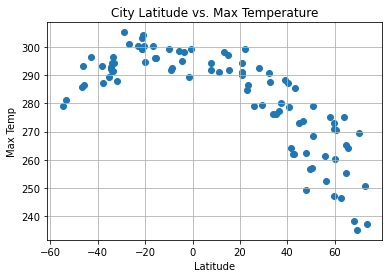

In [13]:
x_lat=filter_data_df['Latitude']
y_maxtemp = filter_data_df['Max Temp']

plt.scatter(x_lat, y_maxtemp,)
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel ("Max Temp")
plt.grid(True)

## Latitude vs. Humidity Plot

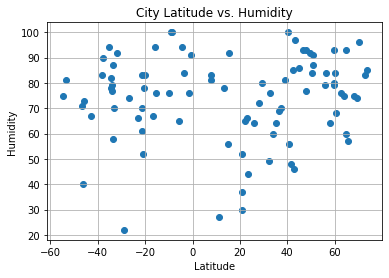

In [14]:
x_lat=filter_data_df['Latitude']
y_humidity = filter_data_df['Humidity']

plt.scatter(x_lat, y_humidity,)
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel ("Humidity")
plt.grid(True)

## Latitude vs. Cloudiness Plot

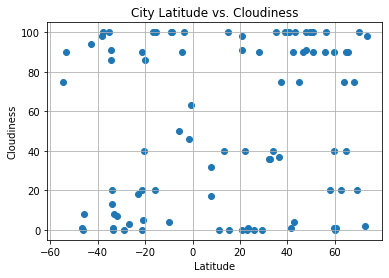

In [15]:
x_lat=filter_data_df['Latitude']
y_clouds = filter_data_df['Cloudiness']

plt.scatter(x_lat, y_clouds,)
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel ("Cloudiness")
plt.grid(True)

## Latitude vs. Wind Speed Plot

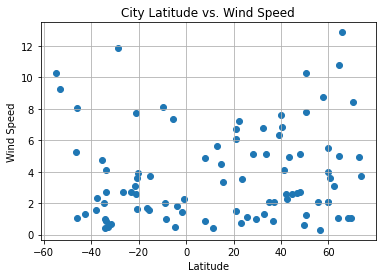

In [16]:
x_lat=filter_data_df['Latitude']
y_wind = filter_data_df['Wind Speed']

plt.scatter(x_lat, y_wind,)
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel ("Wind Speed")
plt.grid(True)

In [17]:
northern_df=filter_data_df.loc[:,'Latitude']>=0
filter_northern_df=filter_data_df.loc[northern_df, :]
filter_northern_df.describe()
      


,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Data
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,5.400000e+01
mean,42.862191,-5.964633,273.028333,72.888889,56.037037,4.049074,1.611969e+09
std,18.537006,92.850997,16.843609,17.436317,40.747711,2.925660,5.744741e+01
min,7.766900,-165.406400,235.150000,27.000000,0.000000,0.300000,1.611969e+09
25%,28.335050,-75.366300,262.040000,64.000000,17.750000,1.625000,1.611969e+09
50%,42.934350,-7.936650,275.150000,76.500000,75.000000,3.560000,1.611969e+09
75%,59.685625,67.955450,287.452500,84.750000,96.250000,5.620000,1.611969e+09
max,73.506900,156.125000,299.150000,100.000000,100.000000,12.860000,1.611969e+09


In [18]:
southern_df = filter_data_df.loc[:,'Latitude']<0
filter_southern_df=filter_data_df.loc[southern_df, :]
filter_southern_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Data
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,3.700000e+01
mean,-26.058357,11.109330,294.456757,75.918919,49.378378,3.437838,1.611969e+09
std,14.771006,99.523881,6.008540,15.848902,41.942654,3.010827,6.749611e+01
min,-54.800000,-175.200000,279.150000,22.000000,0.000000,0.450000,1.611969e+09
25%,-34.532200,-70.916700,291.530000,70.000000,7.000000,1.410000,1.611969e+09
50%,-26.785200,20.040300,294.590000,77.000000,46.000000,2.300000,1.611969e+09
75%,-15.716700,102.265500,299.150000,84.000000,91.000000,4.120000,1.611969e+09
max,-0.739300,170.503600,305.150000,100.000000,100.000000,11.830000,1.611969e+09


## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6845951638903245


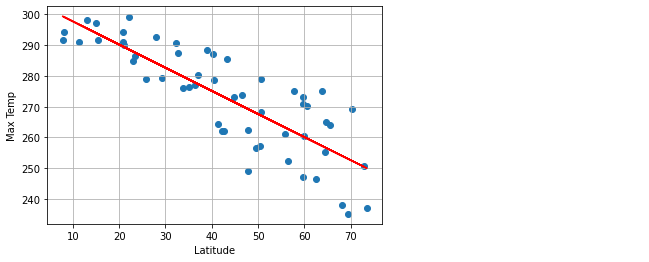

In [19]:
x_values = filter_northern_df['Latitude']
y_values = filter_northern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(100,250),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.grid(True)
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5232468873460985


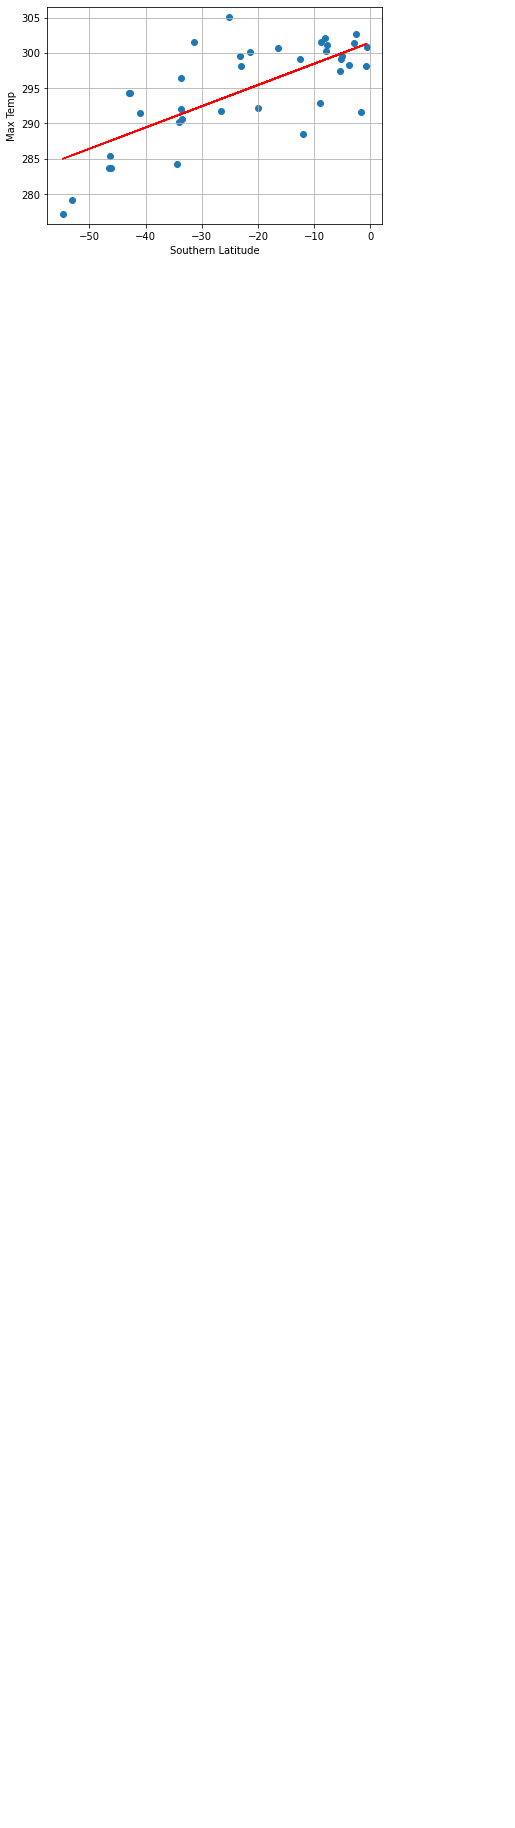

In [145]:
x_values = filter_southern_df['Latitude']
y_values = filter_southern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.grid(True)
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.16165666960549782


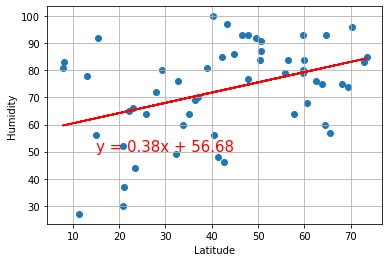

In [20]:
x_values = filter_northern_df['Latitude']
y_values = filter_northern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.grid(True)
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.05933866823856939


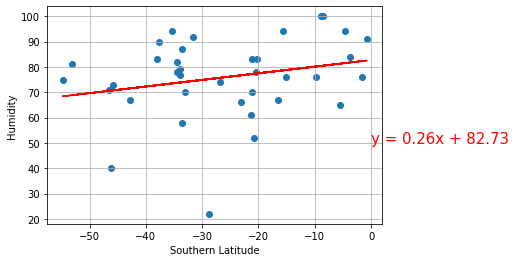

In [21]:
x_values = filter_southern_df['Latitude']
y_values = filter_southern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.grid(True)
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05009134557072153


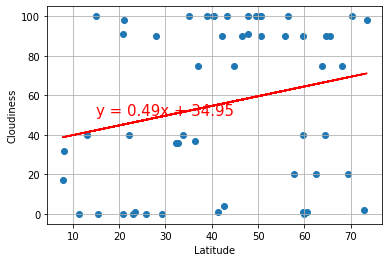

In [22]:
x_values = filter_northern_df['Latitude']
y_values = filter_northern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.grid(True)
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.02551182432724452


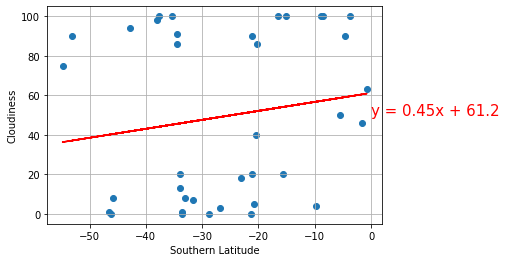

In [23]:
x_values = filter_southern_df['Latitude']
y_values = filter_southern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.grid(True)
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.024069523786505457


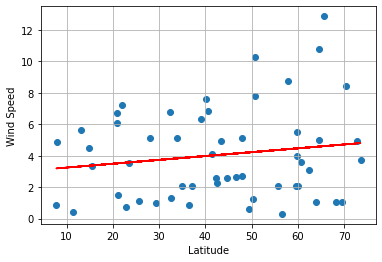

In [24]:
x_values = filter_northern_df['Latitude']
y_values = filter_northern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.grid(True)
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.06289610680599167


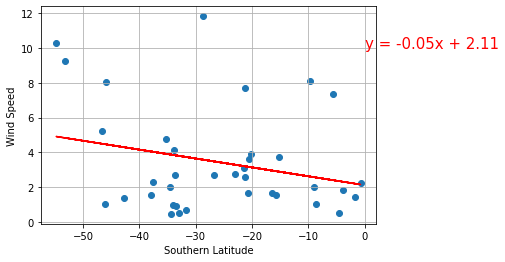

<Figure size 432x288 with 0 Axes>

In [25]:
x_values = filter_southern_df['Latitude']
y_values = filter_southern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.grid(True)
plt.show()
plt.savefig('..\output_data\SH_Wind_Speed.png')